Introduction to the Heart Disease Dataset (Cleveland)

The Heart Cleveland dataset is a well-known dataset in the field of machine learning and medical data analysis, primarily used for predicting the presence of heart disease in patients. It was originally collected from the Cleveland Clinic Foundation and later made available through the UCI Machine Learning Repository.

This dataset contains various medical attributes that are commonly measured in patients suspected of having heart-related conditions. The goal is to analyze these features to build a model that can predict whether a person is likely to have heart disease (diagnosis) based on their medical parameters.
The dataset is highly valuable for:

.Predictive modeling and classification (e.g., Logistic Regression, Decision Trees, SVM)
.Statistical analysis of risk factors
.Feature importance and correlation studies

Overall, the Heart Cleveland dataset serves as an essential resource for understanding cardiovascular health risks, helping researchers and data scientists develop intelligent systems for early diagnosis of heart disease

In [5]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [6]:
#import dataset
df=pd.read_csv(r"C:\datascience\project\machine learning1\heart_cleveland_upload.csv")
print(" first 5 rows")
print(df.head())

 first 5 rows
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [7]:
#data cleaning
print(df.isna().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'cp'),
  Text(3, 0, 'trestbps'),
  Text(4, 0, 'chol'),
  Text(5, 0, 'fbs'),
  Text(6, 0, 'restecg'),
  Text(7, 0, 'thalach'),
  Text(8, 0, 'exang'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'ca'),
  Text(12, 0, 'thal'),
  Text(13, 0, 'condition')])

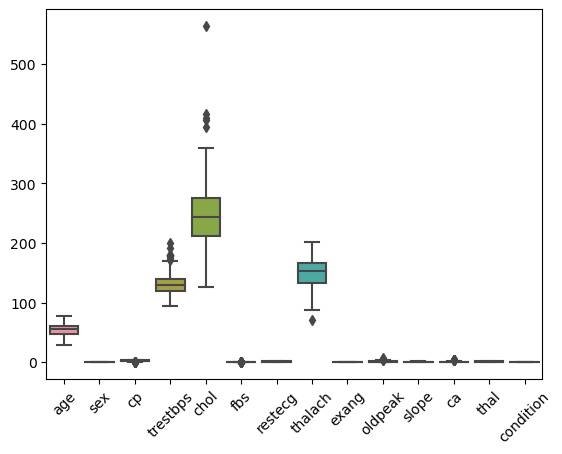

In [8]:
sns.boxplot(df)
plt.xticks(rotation=45)

In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print("Data after removing outliers:\n", df.head())

Data after removing outliers:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
23   74    0   1       120   269    0        2      121      1      0.2   
24   71    0   1       160   302    0        0      162      0      0.4   
25   70    1   1       156   245    0        2      143      0      0.0   
27   63    0   1       140   195    0        0      179      0      0.0   
28   62    1   1       120   281    0        2      103      0      1.4   

    slope  ca  thal  condition  
23      0   1     0          0  
24      0   2     0          0  
25      0   0     0          0  
27      0   2     0          0  
28      1   1     2          1  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'cp'),
  Text(3, 0, 'trestbps'),
  Text(4, 0, 'chol'),
  Text(5, 0, 'fbs'),
  Text(6, 0, 'restecg'),
  Text(7, 0, 'thalach'),
  Text(8, 0, 'exang'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'ca'),
  Text(12, 0, 'thal'),
  Text(13, 0, 'condition')])

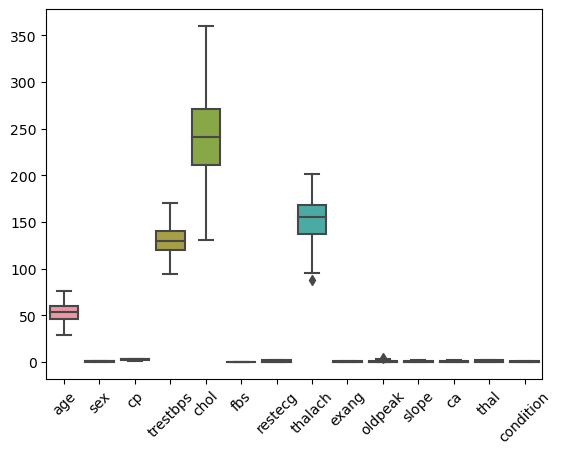

In [10]:
sns.boxplot(df)
plt.xticks(rotation=45)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 23 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        212 non-null    int64  
 1   sex        212 non-null    int64  
 2   cp         212 non-null    int64  
 3   trestbps   212 non-null    int64  
 4   chol       212 non-null    int64  
 5   fbs        212 non-null    int64  
 6   restecg    212 non-null    int64  
 7   thalach    212 non-null    int64  
 8   exang      212 non-null    int64  
 9   oldpeak    212 non-null    float64
 10  slope      212 non-null    int64  
 11  ca         212 non-null    int64  
 12  thal       212 non-null    int64  
 13  condition  212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 24.8 KB


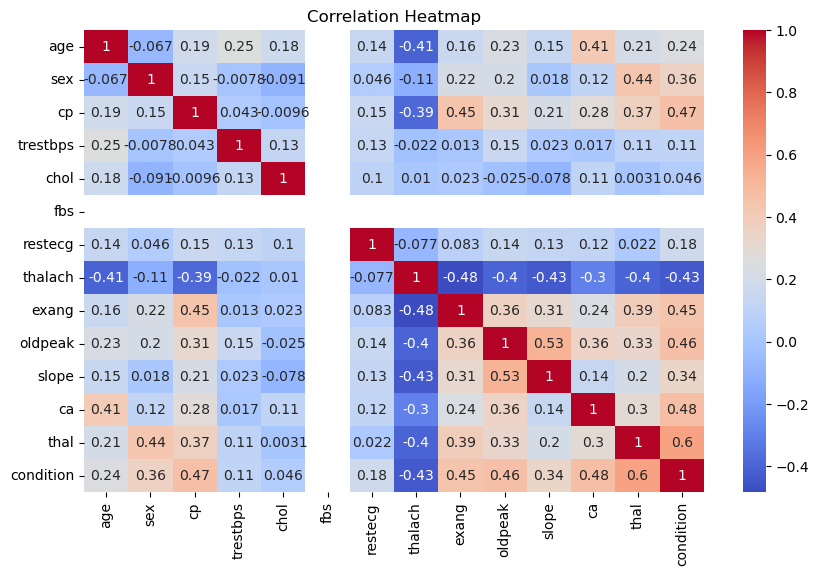

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
x=df[['cp','fbs','thalach','exang','oldpeak','ca','thal']]
y=df['condition']

In [14]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter= 1000)
# fitting model with data
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [16]:
#Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred) )
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred) ))
print("Accuracy:", metrics. accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.18604651162790697
Mean Squared Error: 0.18604651162790697
Root Mean Squared Error: 0.43133109281375365
Accuracy: 0.813953488372093


using svm

In [18]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(X_train)
x_test= st_x. transform(X_test)


from sklearn.svm import SVC 
classifier = SVC(kernel='linear' ,random_state=0)
classifier.fit(X_train, y_train)


#Predicting the test set result
y_pred= classifier.predict(X_test)

# evaluate predictions
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.2f'% (accuracy*100))
test=[[1,0,130,1,0.1,1,0]]
test=st_x.transform(test)
y_pred_2=classifier.predict(test)
print(y_pred_2)

Accuracy: 81.40
[0]


c:\Users\ruksana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ruksana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


CONCLUTION
